In [1]:
import pandas as pd

AMOUNT_OF_DATA = 160000 # If it takes to long, make this number smaller (:

dataset = pd.read_csv(
    "data/final.csv"
)[:AMOUNT_OF_DATA].drop(columns=["id"]) # ID won't be usefull during training, so just dropping it.

print(dataset.head())

   store_nbr      family  sales  onpromotion  dcoilwtico   type_x type_y  \
0          1  AUTOMOTIVE    0.0            0         NaN  Holiday      D   
1          1   BABY CARE    0.0            0         NaN  Holiday      D   
2          1      BEAUTY    0.0            0         NaN  Holiday      D   
3          1   BEVERAGES    0.0            0         NaN  Holiday      D   
4          1       BOOKS    0.0            0         NaN  Holiday      D   

   cluster  
0       13  
1       13  
2       13  
3       13  
4       13  


In [2]:
from sklearn.model_selection import train_test_split

# Seperating the dataset into X, Y and then splitting that into a test and a train set 
X = dataset.drop('sales', axis=1)
y = dataset['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The oil dataset is not completely filled, so we fill it in with the mean oil price
X_train['dcoilwtico'] = X_train['dcoilwtico'].fillna(X_train['dcoilwtico'].mean())
X_test['dcoilwtico'] = X_test['dcoilwtico'].fillna(X_train['dcoilwtico'].mean())

X_train = pd.get_dummies(X_train, columns=['family', 'type_x', 'type_y'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['family', 'type_x', 'type_y'], drop_first=True)

print(X_train.head())
print(X_test.head())

        store_nbr  onpromotion  dcoilwtico  cluster  family_BABY CARE  \
57270          16            0   94.321038        3             False   
36565          35            0   94.321038        3              True   
144640         18            0   94.321038       16              True   
144524         14            0   94.321038        7             False   
104325         36            0   92.030000       10             False   

        family_BEAUTY  family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
57270           False             False         False                False   
36565           False             False         False                False   
144640          False             False         False                False   
144524          False             False         False                False   
104325          False             False         False                False   

        family_CELEBRATION  ...  family_POULTRY  family_PREPARED FOODS  \
57270             

Another problem with the dataset is that some of the numbers are not between 0 and 1, which the program expects, welp... that's where the standardScaler comes in. It very simply just makes the numbers between them. We could write our own code for this, but the internet told me to do this, so I will.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['dcoilwtico', 'onpromotion', 'store_nbr', 'cluster']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# LinearRegression

Very simple linear model. I am not sure how it takes the class labels into account, but I assume it just sees each possible label as it's own axis (so in that case we would have 45 axis).

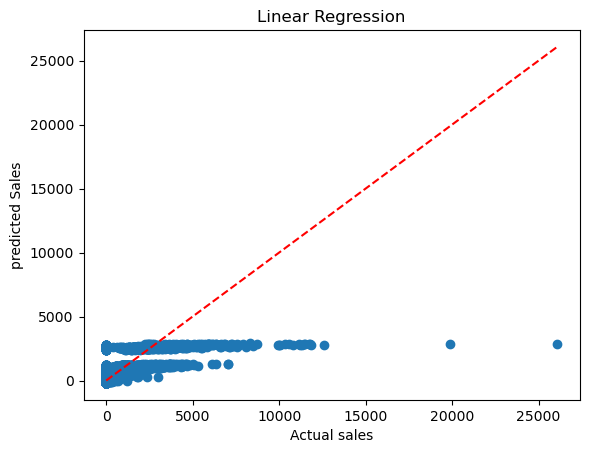

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print(y_pred)
# print(y_test.head())

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual sales")
plt.ylabel("predicted Sales")
plt.title("Linear Regression")
plt.plot([0, max(y_test)], [0, max(y_test)], "r--")
plt.show()


# K-nearest neighbour

So, since sklearn is actually really easy to use, this wasn't hard to implement. Just for fun I made a forloop that goes trough a few of the K values. 

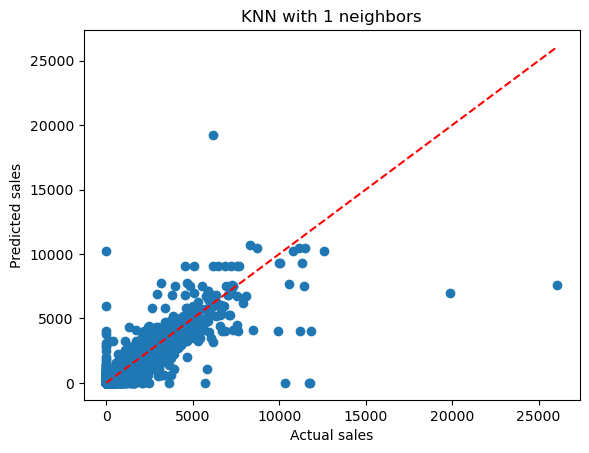

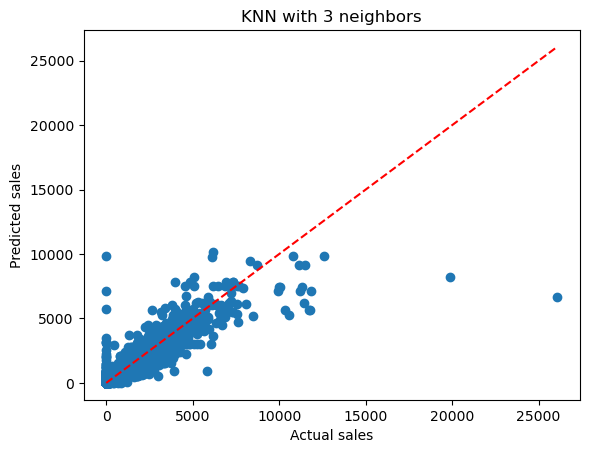

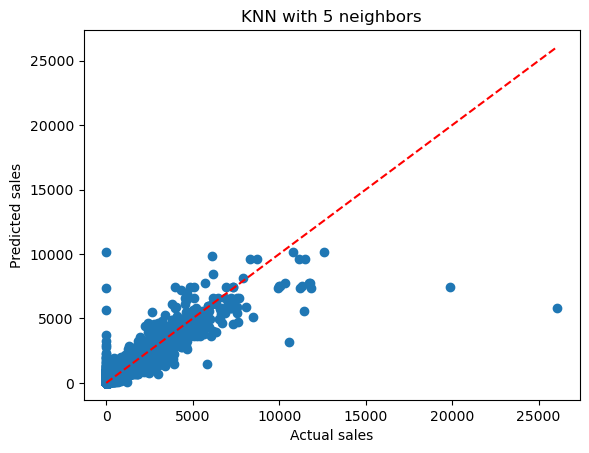

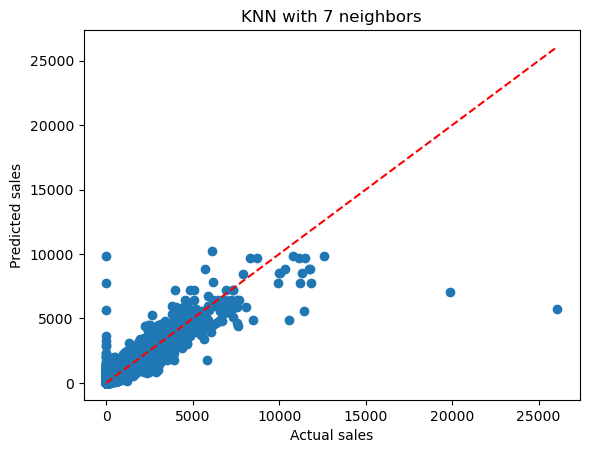

In [5]:
from sklearn.neighbors import KNeighborsRegressor

testList = [1, 3, 5, 7]

for i in testList:
    model = KNeighborsRegressor(n_neighbors=i)

    model.fit(X_train, y_train)

    predicted_values = model.predict(X_test)

    import matplotlib.pyplot as plt

    plt.figure()
    plt.scatter(y_test, predicted_values)
    plt.xlabel("Actual sales")
    plt.ylabel("Predicted sales")
    plt.title(f"KNN with {i} neighbors")
    plt.plot([0, max(y_test)], [0, max(y_test)], "r--") # guideline thingy
    plt.show()

# Decision Tree

A similar implementation to the ones above, just using a different model to see which ones suit best.

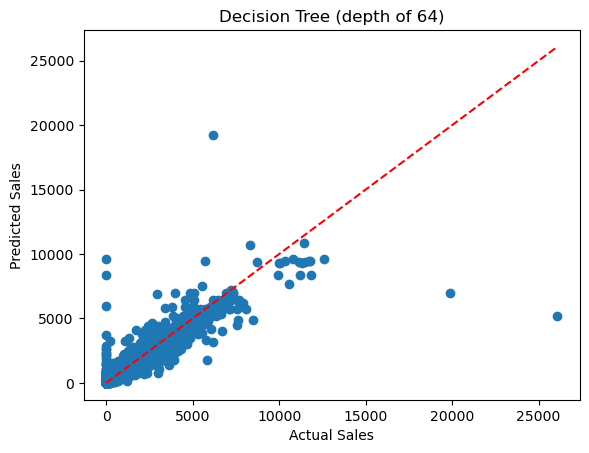

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=64, random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)

plt.figure()
plt.scatter(y_test, predicted_values)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(f"Decision Tree (depth of 64)")
plt.plot([0, max(y_test)], [0, max(y_test)], "r--")
plt.show()


# Random Forest

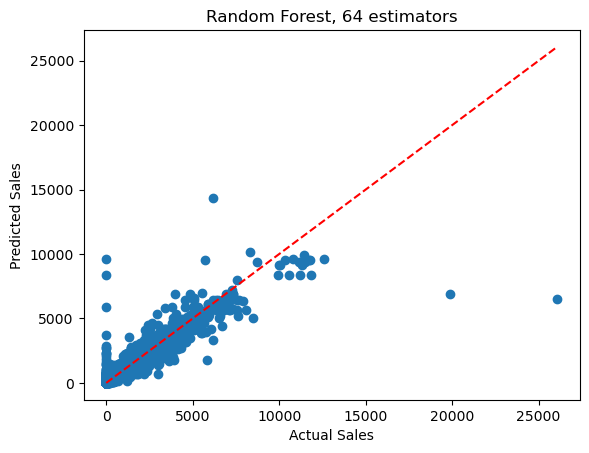

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=64, random_state=42)
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)

plt.figure()
plt.scatter(y_test, predicted_values)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest, 64 estimators")
plt.plot([0, max(y_test)], [0, max(y_test)], "r--")
plt.show()
